# **Exploring the Driving Factors: An In-Depth Analysis of Used Car Prices**

**Abstract**

The analysis of used car prices is of significant interest to both consumers and the automotive industry. This project delves into the intricate dynamics that shape the pricing of pre-owned vehicles. Using a comprehensive dataset of used car listings, we explore the driving factors behind price variations.

Our investigation begins by identifying the key features and attributes that exert the most significant influence on used car prices. We examine the relationships between factors such as brand, mileage, age, location, and vehicle condition to uncover correlations and patterns. Additionally, we investigate the impact of transmission type, color preferences, and seasonal fluctuations on pricing trends.

The findings from this analysis provide valuable insights for potential car buyers, sellers, and industry stakeholders. Understanding the factors that affect used car prices can aid in making informed decisions, whether purchasing, selling, or pricing vehicles. Moreover, this research contributes to a deeper understanding of the broader trends in the used car market.

**Confounders**:

Mileage: Mileage can be a confounder as it may be associated with both the age of the car and its price. Older cars tend to have higher mileage, and both age and mileage can affect pricing.

Vehicle Age: The age of a car can be a confounder, as it is likely associated with factors such as wear and tear, maintenance history, and depreciation, all of which can influence price.

Location: Location can be a confounder, as regional variations in demand, supply, and economic conditions may affect used car prices. Urban vs. rural areas may exhibit different pricing trends.

**Colliders**:

Car Color: Car color could potentially be a collider if it is not directly related to used car prices but is influenced by other factors like brand or buyer preferences. Conditioning on color may lead to spurious associations.

Transmission Type: Similar to car color, the type of transmission (automatic or manual) could be a collider if it is not directly related to pricing but is influenced by factors like car brand or market trends.

Seasonal Trends: Seasonal variations in pricing could act as colliders if they are driven by external factors such as holidays, promotions, or supply-demand dynamics. Conditioning on seasons may induce spurious relationships.

# **Pre-Processing**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/used_cars.csv')
print(df.head())
print(df.info())
print(df.describe())
df = df.dropna()
df = df.drop_duplicates()
df['milage'] = df['milage'].str.replace(',', '')  # Remove commas
df['milage'] = df['milage'].str.extract(r'(\d+)').astype(int)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(int)


      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

<ipython-input-13-fea7a53cbcbe>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(int)


# **EDA**

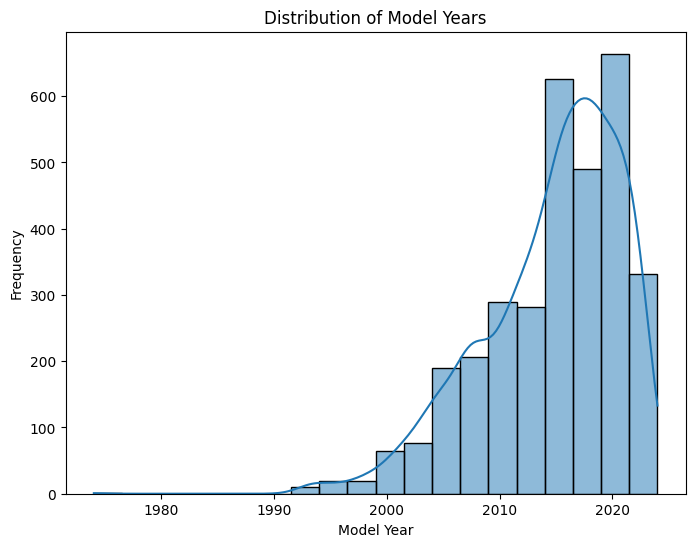

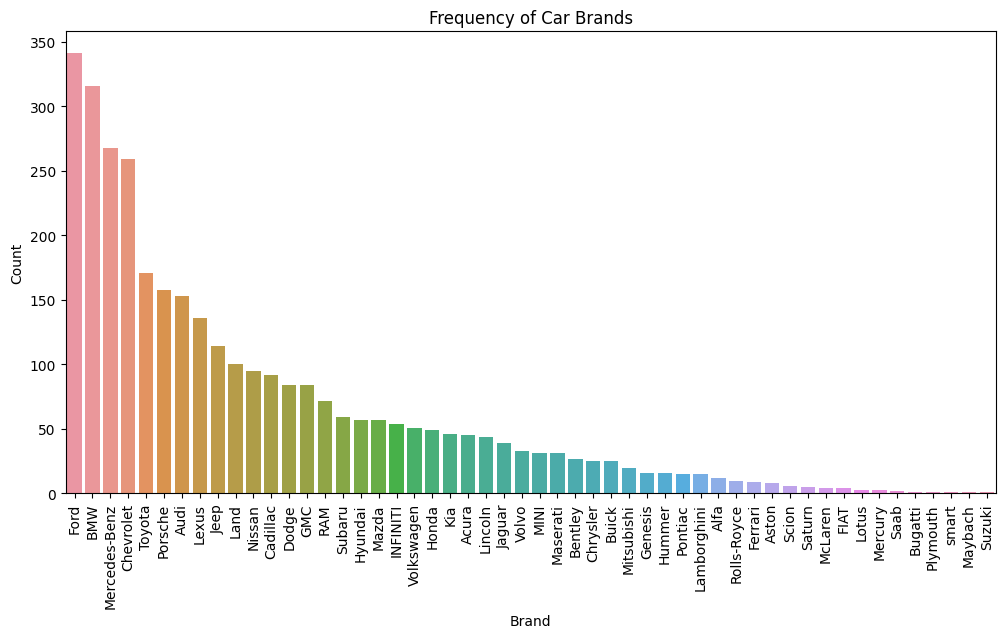

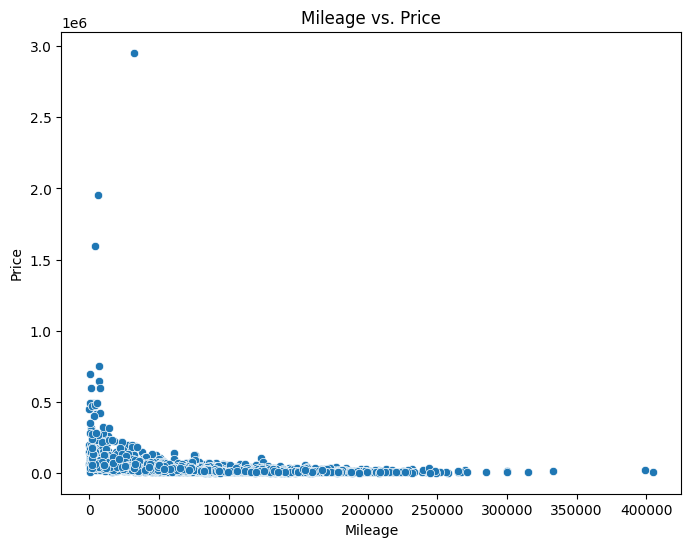

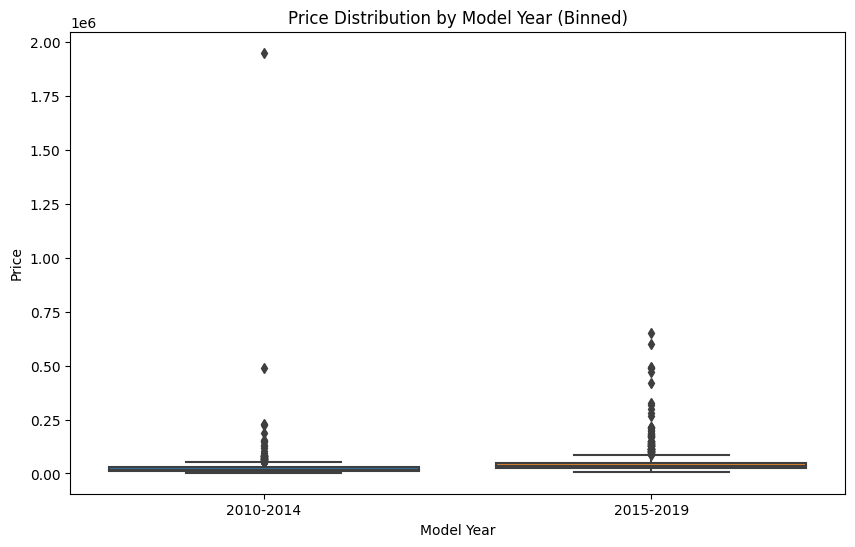

<ipython-input-16-08b87f6fd54c>:48: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


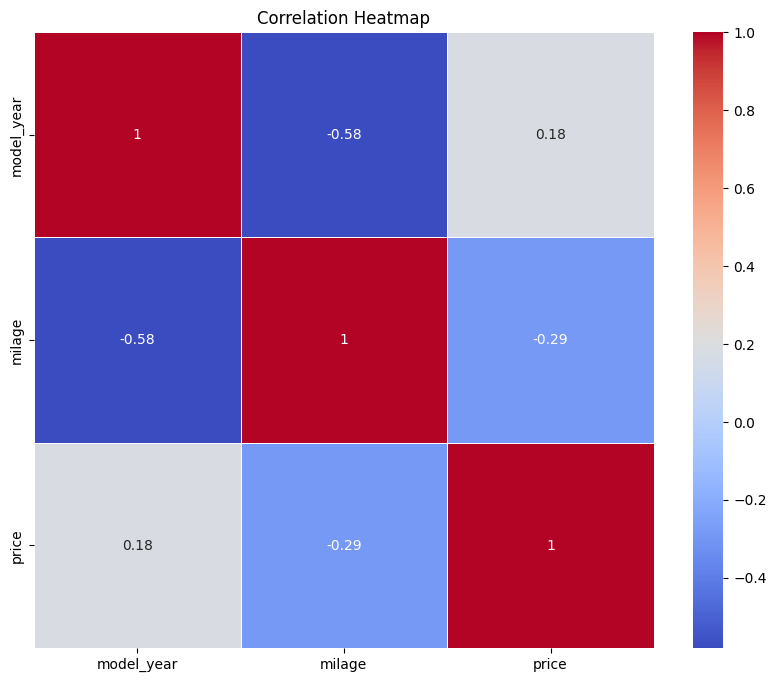

In [16]:
# 1. Histogram of 'model_year' to see the distribution of model years.
plt.figure(figsize=(8, 6))
sns.histplot(df['model_year'], bins=20, kde=True)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# 2. Countplot of 'brand' to visualize the frequency of each car brand.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Frequency of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='milage', y='price')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# top_brands = df['brand'].value_counts().nlargest(10).index
# df_filtered = df[df['brand'].isin(top_brands)]
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df_filtered, y='brand', hue='price')
# plt.title('Price Distribution by Car Brand (Top 10)')
# plt.xlabel('Count')
# plt.ylabel('Car Brand')
# plt.legend(title='Price')
# plt.show()


bins = [2010, 2015, 2020]  # Adjust the bin edges as needed
labels = ['2010-2014', '2015-2019']
df['model_year_bin'] = pd.cut(df['model_year'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='model_year_bin', y='price')
plt.title('Price Distribution by Model Year (Binned)')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Conclusion: Factors Influencing Used Car Prices**

In our study of used car prices, we examined various factors to understand their impact on pricing trends. The analysis revealed several key insights that shed light on the used car market:

Ford and BMW emerged as the most popular car brands in our dataset. These brands have a significant presence in the used car market, and their popularity could be attributed to factors such as brand reputation, reliability, and market demand.

Model years 2018 and 2020 stood out as the most prevalent among the used cars in our dataset. This suggests that consumers may have a preference for relatively recent models when purchasing used cars. These model years likely reflect the appeal of up-to-date features, safety advancements, and performance improvements.

Our analysis showed a notable pricing trend related to mileage. As mileage increases beyond a certain threshold, typically around 50,000 miles, prices tend to stagnate or decrease. This pattern aligns with common market expectations, as higher mileage is often associated with increased wear and potential maintenance costs. Buyers appear to favor lower-mileage vehicles, which may explain the price decline as mileage increases.

These findings highlight the significance of brand reputation, model year preference, and mileage considerations in the used car market. When pricing or purchasing used cars, consumers tend to favor reliable brands, recent models, and lower-mileage vehicles.

While our study provides valuable insights into the used car market, it's essential to note that pricing can be influenced by various additional factors, including vehicle condition, geographic location, market demand, and specific vehicle features. Future research could delve deeper into these factors to gain a more comprehensive understanding of the complex dynamics driving used car prices.

In conclusion, our analysis offers valuable information for both buyers and sellers navigating the used car market. Understanding the factors influencing pricing trends can assist consumers in making informed decisions when purchasing a used vehicle, ultimately contributing to a more efficient and transparent marketplace.